# **ST2195 Programming in Data Science**

# **Data Wrangling**

Cynthia Khong Qing
210407112

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
from scipy.stats import ttest_ind
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import r2_score, f1_score, mean_squared_error
import statsmodels.api as sm
import category_encoders as ce
from sklearn.feature_selection import RFE



In [2]:
# Read Data
data_2006 = pd.read_csv(r"C:\Users\cynth\OneDrive\Documents\STUDY\Y2\Programming\coursework\2006.csv")
data_2007 = pd.read_csv(r"C:\Users\cynth\OneDrive\Documents\STUDY\Y2\Programming\coursework\2007.csv")

In [4]:
print(data_2006.shape)
print(data_2007.shape)

(7141922, 29)
(7453215, 29)


In [3]:
#Combine two years into one data frame
df = pd.concat([data_2006, data_2007])
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2006,1,11,3,743.0,745,1024.0,1018,US,343,...,45,13,0,NaN,0,0,0,0,0,0
1,2006,1,11,3,1053.0,1053,1313.0,1318,US,613,...,27,19,0,NaN,0,0,0,0,0,0
2,2006,1,11,3,1915.0,1915,2110.0,2133,US,617,...,4,11,0,NaN,0,0,0,0,0,0
3,2006,1,11,3,1753.0,1755,1925.0,1933,US,300,...,16,10,0,NaN,0,0,0,0,0,0
4,2006,1,11,3,824.0,832,1015.0,1015,US,765,...,27,12,0,NaN,0,0,0,0,0,0


In [6]:
df.shape

(14595137, 29)

In [7]:
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [8]:
df.dtypes

Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn                 int64
TaxiOut                int64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay           int64
WeatherDelay           int64
NASDelay               int64
SecurityDelay          int64
LateAircraftDelay      int64
dtype: object

In [9]:
df.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1.459514e+07,1.459514e+07,1.459514e+07,1.459514e+07,1.431246e+07,1.459514e+07,1.427909e+07,1.459514e+07,1.459514e+07,1.427909e+07,...,1.459514e+07,1.459514e+07,1.459514e+07,1.459514e+07,1.459514e+07,1.459514e+07,1.459514e+07,1.459514e+07,1.459514e+07,1.459514e+07
mean,2.006511e+03,6.538310e+00,1.572821e+01,3.941697e+00,1.339796e+03,1.331405e+03,1.484467e+03,1.495575e+03,2.187446e+03,1.261937e+02,...,7.238142e+02,6.872862e+00,1.602864e+01,1.936823e-02,2.286035e-03,3.635713e+00,7.258234e-01,3.686945e+00,2.728834e-02,4.813299e+00
std,4.998863e-01,3.425110e+00,8.783863e+00,1.992110e+00,4.782160e+02,4.636542e+02,5.040900e+02,4.801644e+02,1.980504e+03,7.124866e+01,...,5.683351e+02,2.208140e+01,1.156531e+01,1.378155e-01,4.775782e-02,1.987083e+01,9.085721e+00,1.591085e+01,1.183342e+00,2.059818e+01
min,2.006000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,5.000000e+00,...,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.006000e+03,4.000000e+00,8.000000e+00,2.000000e+00,9.300000e+02,9.300000e+02,1.108000e+03,1.115000e+03,5.870000e+02,7.500000e+01,...,3.170000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.007000e+03,7.000000e+00,1.600000e+01,4.000000e+00,1.329000e+03,1.324000e+03,1.515000e+03,1.520000e+03,1.501000e+03,1.080000e+02,...,5.690000e+02,5.000000e+00,1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.007000e+03,1.000000e+01,2.300000e+01,6.000000e+00,1.732000e+03,1.720000e+03,1.911000e+03,1.906000e+03,3.499000e+03,1.560000e+02,...,9.510000e+02,8.000000e+00,1.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,2.007000e+03,1.200000e+01,3.100000e+01,7.000000e+00,2.930000e+03,2.359000e+03,2.955000e+03,2.400000e+03,9.619000e+03,1.879000e+03,...,4.962000e+03,1.501000e+03,6.020000e+02,1.000000e+00,1.000000e+00,2.580000e+03,1.429000e+03,1.392000e+03,3.820000e+02,1.366000e+03


In [4]:
#Create a date for convenient
df['Date'] = pd.to_datetime(df[['Year','Month','DayofMonth']].rename(columns={'DayofMonth': 'Day'}))
df['Date']

0         2006-01-11
1         2006-01-11
2         2006-01-11
3         2006-01-11
4         2006-01-11
             ...    
7453210   2007-12-15
7453211   2007-12-15
7453212   2007-12-15
7453213   2007-12-15
7453214   2007-12-15
Name: Date, Length: 14595137, dtype: datetime64[ns]

In [5]:
#Create a Total Delay Column
df['Delay'] = df['ArrDelay']
#If we add DepDelay and ArrDelay there will be double counting delay as the correlation is high
#so we use ArrDelay as the overall delay

In [12]:
#Check Null Value
df.isnull().sum()

Year                        0
Month                       0
DayofMonth                  0
DayOfWeek                   0
DepTime                282682
CRSDepTime                  0
ArrTime                316047
CRSArrTime                  0
UniqueCarrier               0
FlightNum                   0
TailNum                    22
ActualElapsedTime      316047
CRSElapsedTime            998
AirTime                316047
ArrDelay               316047
DepDelay               282682
Origin                      0
Dest                        0
Distance                    0
TaxiIn                      0
TaxiOut                     0
Cancelled                   0
CancellationCode     14312454
Diverted                    0
CarrierDelay                0
WeatherDelay                0
NASDelay                    0
SecurityDelay               0
LateAircraftDelay           0
Date                        0
Delay                  316047
dtype: int64

In [13]:
df.shape

(14595137, 31)

<AxesSubplot:>

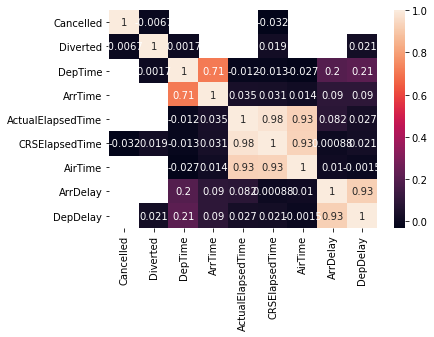

In [14]:
diverted = df[['Cancelled','Diverted','DepTime','ArrTime','ActualElapsedTime','CRSElapsedTime','AirTime','ArrDelay','DepDelay']]
sns.heatmap(diverted.corr() , annot= True)

In [15]:
diverted = diverted[diverted['Diverted'] == 0]
diverted = diverted[diverted['Cancelled'] == 0 ]
diverted.isnull().sum() #Therefore, the null values only occur when Diverted and Cancelled = 1

Cancelled            0
Diverted             0
DepTime              0
ArrTime              0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
dtype: int64

There are three more supplementary information

In [6]:
airports = pd.read_csv(r"C:\Users\cynth\OneDrive\Documents\STUDY\Y2\Programming\coursework\airports.csv")
carriers = pd.read_csv(r"C:\Users\cynth\OneDrive\Documents\STUDY\Y2\Programming\coursework\carriers.csv")
plane = pd.read_csv(r"C:\Users\cynth\OneDrive\Documents\STUDY\Y2\Programming\coursework\plane-data.csv")

In [17]:
airports.shape

(3376, 7)

In [18]:
airports.value_counts()

iata  airport                                   city           state  country  lat        long       
00M   Thigpen                                   Bay Springs    MS     USA      31.953765  -89.234505     1
MKG   Muskegon County                           Muskegon       MI     USA      43.169488  -86.238223     1
MGM   Montgomery Regional Apt                   Montgomery     AL     USA      32.300644  -86.393976     1
MGR   Moultrie Municipal                        Moultrie       GA     USA      31.084909  -83.803255     1
MGW   Morgantown Muni-Walter L. Bill Hart Fld.  Morgantown     WV     USA      39.642907  -79.916314     1
                                                                                                        ..
CJR   Culpeper Regional                         Culpeper       VA     USA      38.526708  -77.858855     1
CJX   Crooked Creek                             Crooked Creek  AK     USA      61.869022  -158.137118    1
CKB   Benedum                             

In [19]:
airports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   iata     3376 non-null   object 
 1   airport  3376 non-null   object 
 2   city     3364 non-null   object 
 3   state    3364 non-null   object 
 4   country  3376 non-null   object 
 5   lat      3376 non-null   float64
 6   long     3376 non-null   float64
dtypes: float64(2), object(5)
memory usage: 184.8+ KB


In [20]:
carriers.shape

(1491, 2)

In [21]:
carriers.value_counts()

Code  Description             
02Q   Titan Airways               1
PHL   Phillips Airlines           1
PLA   Planes Inc.                 1
PL    Aero Peru                   1
PKQ   Skyworld Airlines Inc.      1
                                 ..
ENT   Enterprise Airlines Inc.    1
EMP   Empire Airlines Inc. (2)    1
EME   Metro Express               1
EMA   Emerald Airlines            1
ZYZ   Skyway Aviation Inc.        1
Length: 1490, dtype: int64

In [22]:
carriers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1491 entries, 0 to 1490
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Code         1490 non-null   object
 1   Description  1491 non-null   object
dtypes: object(2)
memory usage: 23.4+ KB


In [23]:
plane.shape

(5029, 9)

In [24]:
plane.value_counts()

tailnum  type         manufacturer                   issue_date  model        status  aircraft_type            engine_type  year
N10156   Corporation  EMBRAER                        02/13/2004  EMB-145XR    Valid   Fixed Wing Multi-Engine  Turbo-Fan    2004    1
N697SW   Corporation  BOEING                         01/18/1995  737-3TO      Valid   Fixed Wing Multi-Engine  Turbo-Jet    1988    1
N699BR   Corporation  BOMBARDIER INC                 12/20/2004  CL-600-2B19  Valid   Fixed Wing Multi-Engine  Turbo-Fan    2003    1
N699AE   Corporation  EMBRAER                        01/18/2005  EMB-145LR    Valid   Fixed Wing Multi-Engine  Turbo-Fan    2005    1
N698SW   Corporation  BOEING                         02/16/1995  737-317      Valid   Fixed Wing Multi-Engine  Turbo-Jet    1986    1
                                                                                                                                   ..
N401EA   Corporation  MCDONNELL DOUGLAS              08/31/2000  DC

In [25]:
plane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5029 entries, 0 to 5028
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tailnum        5029 non-null   object
 1   type           4480 non-null   object
 2   manufacturer   4480 non-null   object
 3   issue_date     4480 non-null   object
 4   model          4480 non-null   object
 5   status         4480 non-null   object
 6   aircraft_type  4480 non-null   object
 7   engine_type    4480 non-null   object
 8   year           4480 non-null   object
dtypes: object(9)
memory usage: 353.7+ KB


# **Exploratory Data Analysis (EDA)**

In [26]:
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'Date', 'Delay'],
      dtype='object')

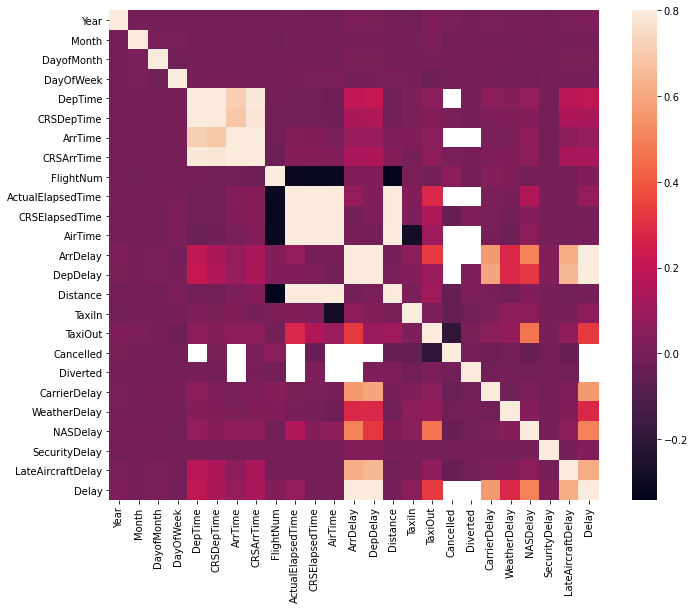

In [27]:
#Plot a correlation heat map to observe relationship between each variable
fig, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(df.corr(), vmax=.8, square=True);
plt.show()

In [28]:
delayed_flights = df[df['Delay'] >= 15]
delayed_flights

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Date,Delay
6,2006,1,11,3,825.0,820,1041.0,1021,US,349,...,0,NaN,0,0,0,20,0,0,2006-01-11,20.0
16,2006,1,11,3,1752.0,1540,1923.0,1654,US,127,...,0,NaN,0,0,0,149,0,0,2006-01-11,149.0
18,2006,1,11,3,1153.0,1145,1324.0,1259,US,637,...,0,NaN,0,0,0,25,0,0,2006-01-11,25.0
23,2006,1,11,3,806.0,810,1035.0,1020,US,218,...,0,NaN,0,0,0,15,0,0,2006-01-11,15.0
34,2006,1,11,3,1851.0,1835,2116.0,2100,US,882,...,0,NaN,0,0,0,0,0,16,2006-01-11,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7453204,2007,12,15,6,1158.0,1143,1932.0,1855,DL,44,...,0,NaN,0,0,0,22,0,15,2007-12-15,37.0
7453206,2007,12,15,6,1940.0,1855,2153.0,2129,DL,47,...,0,NaN,0,0,24,0,0,0,2007-12-15,24.0
7453212,2007,12,15,6,1024.0,1025,1750.0,1735,DL,61,...,0,NaN,0,0,0,15,0,0,2007-12-15,15.0
7453213,2007,12,15,6,1353.0,1315,1658.0,1622,DL,62,...,0,NaN,0,0,0,0,0,36,2007-12-15,36.0


c:\Users\cynth\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


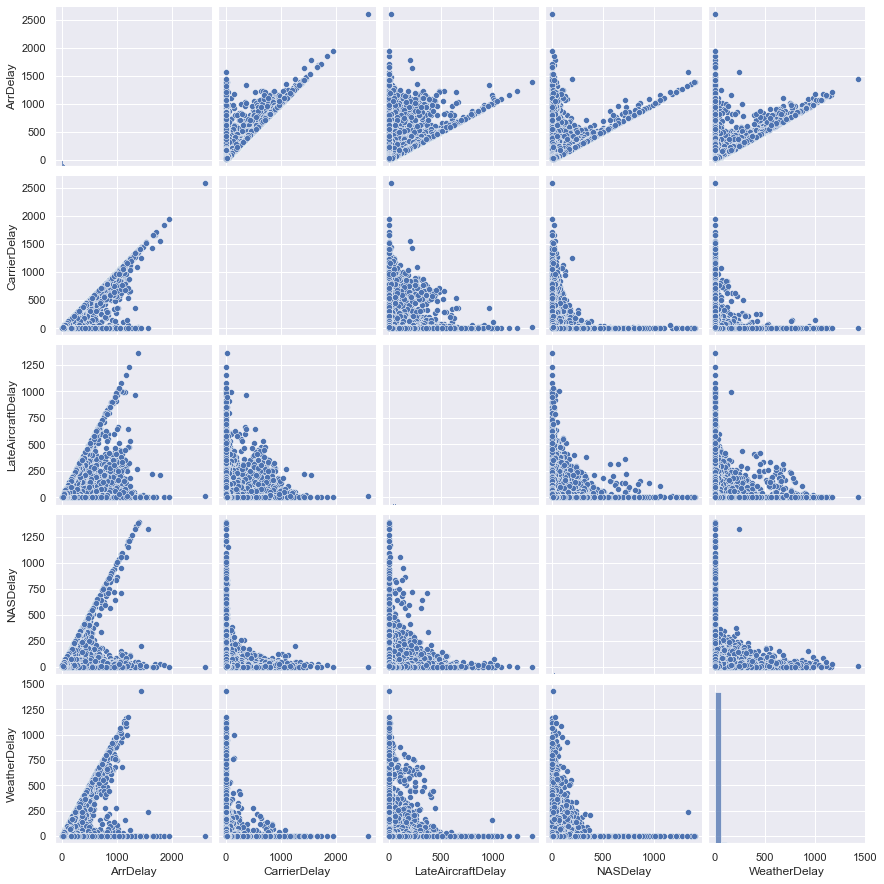

In [29]:
#Scatterplot between factor of delay
sns.set()
cols = ['ArrDelay', 'CarrierDelay', 'LateAircraftDelay', 'NASDelay', 'WeatherDelay']
sns.pairplot(delayed_flights[cols], size = 2.5)
plt.show()

c:\Users\cynth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


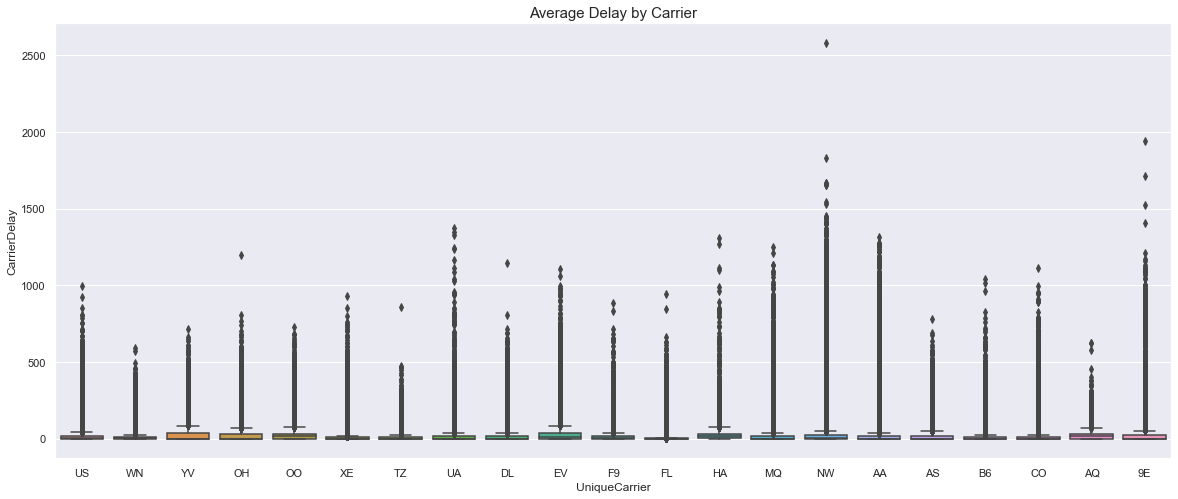

In [30]:
f,ax=plt.subplots(figsize=(20,8))
ax.set_title('Average Delay by Carrier', fontsize = 15)
sns.boxplot('UniqueCarrier','CarrierDelay', data=delayed_flights)
plt.show()

In [31]:
df['CancellationCode'].unique()

array([nan, 'A', 'C', 'B', 'D'], dtype=object)

In [32]:
cancelled_flight = df[df['Cancelled'] == 1]
cancelled_flight

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Date,Delay
11,2006,1,11,3,NaN,1725,NaN,1845,US,69,...,1,A,0,0,0,0,0,0,2006-01-11,NaN
52,2006,1,11,3,NaN,1945,NaN,2127,US,2049,...,1,C,0,0,0,0,0,0,2006-01-11,NaN
70,2006,1,11,3,NaN,1900,NaN,2011,US,2141,...,1,C,0,0,0,0,0,0,2006-01-11,NaN
74,2006,1,11,3,NaN,1630,NaN,1759,US,233,...,1,C,0,0,0,0,0,0,2006-01-11,NaN
99,2006,1,11,3,NaN,1730,NaN,1855,US,1651,...,1,C,0,0,0,0,0,0,2006-01-11,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7453123,2007,12,14,5,NaN,630,NaN,734,DL,1908,...,1,B,0,0,0,0,0,0,2007-12-14,NaN
7453124,2007,12,14,5,NaN,730,NaN,843,DL,1909,...,1,B,0,0,0,0,0,0,2007-12-14,NaN
7453130,2007,12,14,5,NaN,1030,NaN,1138,DL,1915,...,1,B,0,0,0,0,0,0,2007-12-14,NaN
7453131,2007,12,14,5,NaN,1030,NaN,1146,DL,1916,...,1,B,0,0,0,0,0,0,2007-12-14,NaN


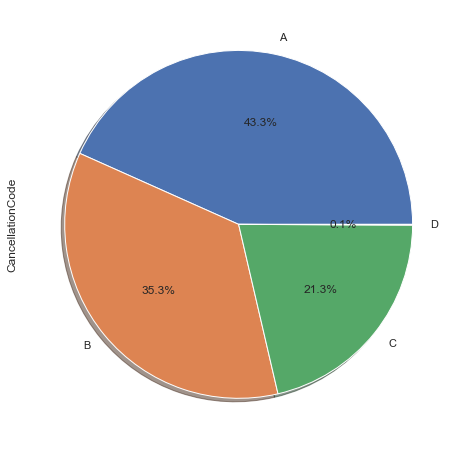

A = carrier, B = weather, C = NAS, D = Security


In [33]:
#Pie chart of the cancelled flight
f,ax=plt.subplots(figsize=(20,8))
cancelled_flight['CancellationCode'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)
plt.show()

print('A = carrier, B = weather, C = NAS, D = Security')

In [34]:
print(df['UniqueCarrier'].value_counts())

WN    2268192
AA    1277454
OO    1145991
MQ    1090582
US     990291
UA     990010
DL     981975
XE     876243
NW     847406
CO     632540
YV     599126
EV     559377
OH     511886
FL     500804
B6     347182
AS     319589
9E     258851
F9     187941
HA     108348
AQ      81747
TZ      19602
Name: UniqueCarrier, dtype: int64


Text(0, 0.5, 'Number of Flights')

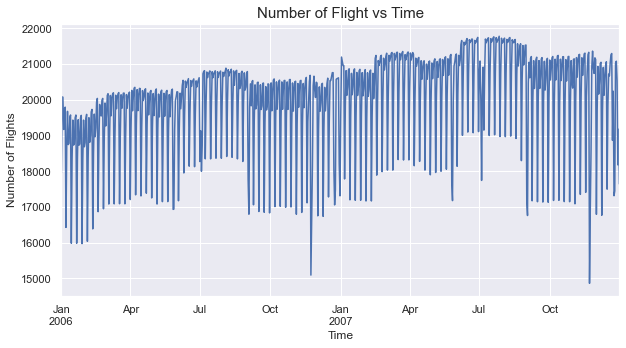

In [35]:
fg, ax = plt.subplots(figsize=(10,5))
df.Date.value_counts().sort_index().plot()
ax.set_title('Number of Flight vs Time', fontsize = 15)
ax.set_xlabel('Time',fontsize = 12)
ax.set_ylabel('Number of Flights',fontsize = 12)

<AxesSubplot:title={'center':'Percentage of flight each day'}, xlabel='Day of Week', ylabel='Percentage of Flight'>

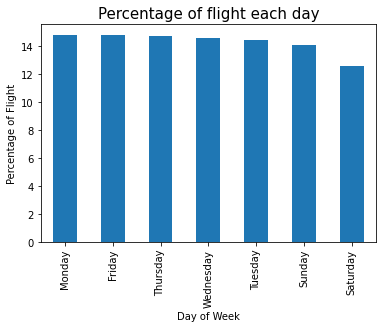

In [7]:
#Percentage of flight each day
df['DayOfWeek'] = df['DayOfWeek'].replace({1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 7: 'Sunday'})
Percentage_dayofweek = df['DayOfWeek'].value_counts()/df['DayOfWeek'].value_counts().sum()*100
day_perc_plot = Percentage_dayofweek.plot(kind = 'bar')
day_perc_plot.set_title('Percentage of flight each day', fontsize = 15)
day_perc_plot.set_xlabel('Day of Week')
day_perc_plot.set_ylabel('Percentage of Flight')
day_perc_plot

<AxesSubplot:title={'center':'Number of Flights according to day of week'}, xlabel='Day of Week', ylabel='Number of Flights'>

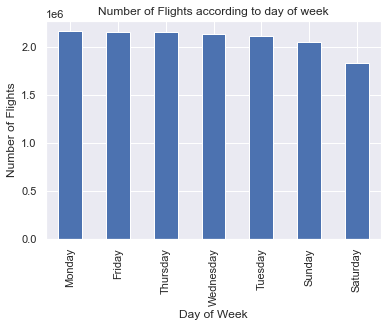

In [37]:
#Plot of Day of Week vs Number of Flights
day_plot = df['DayOfWeek'].value_counts().plot(kind = 'bar')
day_plot.set_title('Number of Flights according to day of week', fontsize = 12)
day_plot.set_xlabel('Day of Week')
day_plot.set_ylabel('Number of Flights')
day_plot

In [38]:
#Percentage of delayed flights
total_flight = df[df.columns[0]].count()
delay_flight = (df['Delay']>0).sum()
ontime_flight = total_flight - delay_flight
percentage1 = delay_flight/total_flight #Percentage of delay flight
percentage2 = ontime_flight/total_flight #Percentage of on time flight
print("Percentage of flight that are delayed : {:.2%}".format(percentage1))
print("Percentage of flight that are on time : {:.2%}".format(percentage2))

Percentage of flight that are delayed : 45.57%
Percentage of flight that are on time : 54.43%


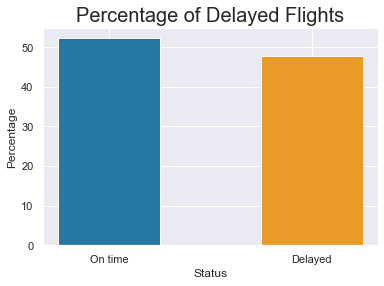

In [39]:
#Create a Delay Plot

delay_plot = pd.DataFrame() #create an empty data frame
delay_plot['Status'] = df['Delay'].apply(lambda x: 'On time' if x <= 0 else 'Delayed')

#Data preparation
plot_counts = delay_plot['Status'].value_counts(normalize=True)*100

#Cretae a bar plot of the delay status counts
c = '#2478A3', '#E99A27'
fig, ax = plt.subplots()
ax.bar(plot_counts.index, plot_counts.values,color = c, width = 0.5)
ax.set_xlabel('Status')
ax.set_ylabel('Percentage')
ax.set_title('Percentage of Delayed Flights', fontsize = 20)

plt.show()

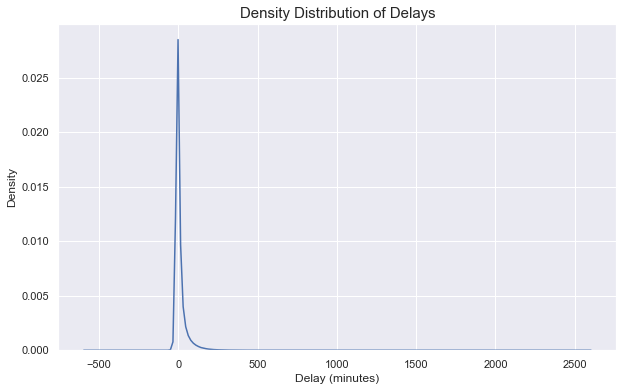

In [40]:
delay_density = df['Delay'].dropna()
fig, ax = plt.subplots(figsize=(10, 6))
sns.kdeplot(delay_density, ax=ax)
ax.set_xlabel('Delay (minutes)')
ax.set_title('Density Distribution of Delays', fontsize = 15)
plt.show()

Most of the data centers around 0, most of the flights had little or no delays.

Question 1 : When is the best time of day, day of the week, and time of year to fly to minimise delays?

1.1 When is the best time of day to minimise delay

In [41]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Date,Delay
0,2006,1,11,Wednesday,743.0,745,1024.0,1018,US,343,...,0,NaN,0,0,0,0,0,0,2006-01-11,6.0
1,2006,1,11,Wednesday,1053.0,1053,1313.0,1318,US,613,...,0,NaN,0,0,0,0,0,0,2006-01-11,-5.0
2,2006,1,11,Wednesday,1915.0,1915,2110.0,2133,US,617,...,0,NaN,0,0,0,0,0,0,2006-01-11,-23.0
3,2006,1,11,Wednesday,1753.0,1755,1925.0,1933,US,300,...,0,NaN,0,0,0,0,0,0,2006-01-11,-8.0
4,2006,1,11,Wednesday,824.0,832,1015.0,1015,US,765,...,0,NaN,0,0,0,0,0,0,2006-01-11,0.0


In [8]:
#data preparing
df['CRSDepTime'] = df['CRSDepTime'].astype(str)
df['CRSDepTime'] = df['CRSDepTime'].str.pad(width=4, side='left', fillchar='0')
df['CRSDepTime']

0          0745
1          1053
2          1915
3          1755
4          0832
           ... 
7453210    1605
7453211    1851
7453212    1025
7453213    1315
7453214    1800
Name: CRSDepTime, Length: 14595137, dtype: object

In [9]:
# prepare departure time block for 1 hour each
df['DEP_TIME_BLK'] = pd.cut(pd.to_datetime(df['CRSDepTime'], format='%H%M').dt.hour, 
                             bins=range(0, 25), labels=[f"{i:02d}:00" for i in range(0, 24)], right=False)

In [10]:
df['DEP_TIME_BLK'].value_counts()

08:00    1011517
07:00    1003426
06:00    1001153
17:00     994366
11:00     958316
09:00     948540
13:00     936318
16:00     930008
10:00     922238
14:00     915541
12:00     915153
15:00     894568
18:00     876469
19:00     843944
20:00     584228
21:00     475199
22:00     179908
05:00      88984
23:00      83990
00:00      19240
01:00       8169
02:00       1888
04:00       1335
03:00        639
Name: DEP_TIME_BLK, dtype: int64

c:\Users\cynth\anaconda3\lib\site-packages\matplotlib\axes\_base.py:405: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


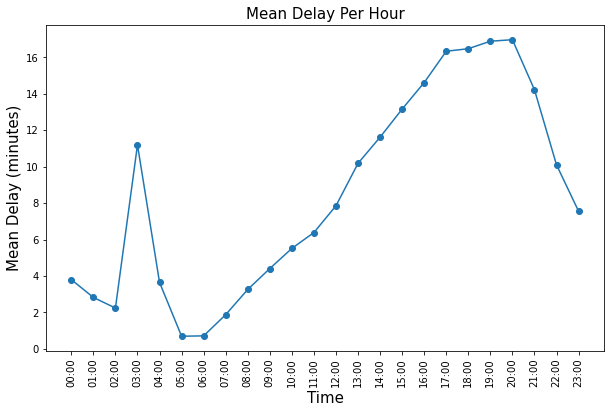

In [11]:
mean_delay_hour = df.groupby('DEP_TIME_BLK')['Delay'].mean()

fig,ax = plt.subplots(figsize = (10,6))
plt.plot(mean_delay_hour, 'o-')
plt.xlabel('Time', fontsize = 15)
plt.ylabel('Mean Delay (minutes)', fontsize = 15)
plt.title('Mean Delay Per Hour', fontsize = 15)
plt.xticks(range(24), mean_delay_hour.index, rotation=90)
plt.show()
#Plot for question 1.1

Therefore, we can conclude that 5.00am to 6.00 am is the best choice to avoid delay.

1.2 When is the best day of week to fly to minimise delay?

In [46]:
df['DayOfWeek'].value_counts()

Monday       2160528
Friday       2158295
Thursday     2150687
Wednesday    2131810
Tuesday      2108884
Sunday       2052064
Saturday     1832869
Name: DayOfWeek, dtype: int64

In [47]:
#Prepare Data
week_delay = df[['DayOfWeek','Delay']]
week_delay_average = week_delay.groupby(by = ['DayOfWeek']).mean()
week_delay_average = week_delay_average.reset_index(drop=False)
week_delay_average['Delay(%)'] = week_delay_average['Delay']/week_delay_average['Delay'].sum()*100
week_delay_average

,DayOfWeek,Delay,Delay(%)
0,Friday,12.701676,19.379511
1,Monday,9.701637,14.802218
2,Saturday,5.513355,8.411970
3,Sunday,9.247222,14.108897
4,Thursday,12.141524,18.524861
5,Tuesday,7.248411,11.059223
6,Wednesday,8.987954,13.713321


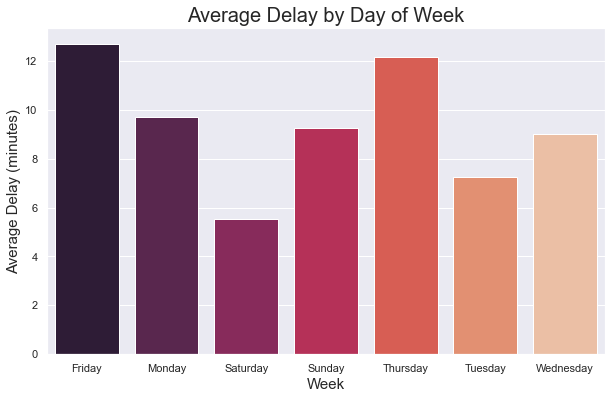

In [48]:
# Bar Plot for question 1.2
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x=week_delay_average['DayOfWeek'], y=week_delay_average['Delay'], palette="rocket", ax=ax)
ax.set_xlabel('Week',fontsize = 15)
ax.set_ylabel('Average Delay (minutes)', fontsize = 15)
ax.set_title('Average Delay by Day of Week', fontsize =20)
plt.show()

From the graph above, we can observe that Saturday has the least average delay, 

1.3 What is the best time of year to fly to minimise delays

In [49]:
df['Month'].value_counts()

8     1282011
7     1269804
3     1244426
10    1241710
5     1234528
6     1227595
12    1218897
1     1202846
4     1199999
11    1191346
9     1185124
2     1096851
Name: Month, dtype: int64

In [50]:
#Prepare Data
year_delay = df[['Month', 'Delay']]
year_delay_average = year_delay.groupby(by=['Month']).mean()
year_delay_average = year_delay_average.reset_index(drop=False)
year_delay_average['Delay(%)'] = year_delay_average['Delay']/year_delay_average['Delay'].sum()*100
year_delay_average

,Month,Delay,Delay(%)
0,1,7.447226,6.573768
1,2,10.498526,9.267192
2,3,9.027283,7.968506
3,4,7.491780,6.613097
4,5,6.964305,6.147487
5,6,14.153010,12.493055
6,7,12.736940,11.243071
7,8,10.662703,9.412113
8,9,6.034441,5.326683
9,10,8.559212,7.555333


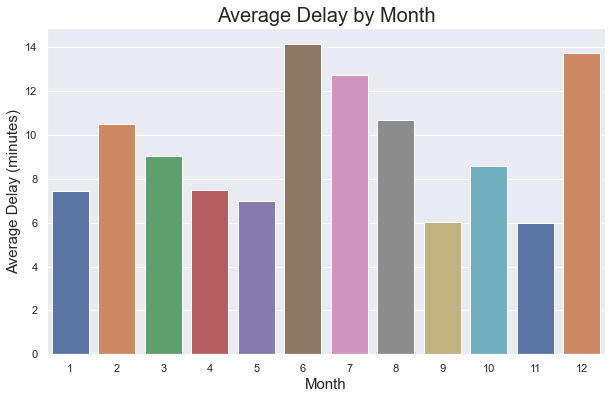

In [51]:
# Bar plot for question 1.3
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x=year_delay_average['Month'], y=year_delay_average['Delay'], palette="deep", ax=ax)
ax.set_xlabel('Month',fontsize = 15)
ax.set_ylabel('Average Delay (minutes)', fontsize = 15)
ax.set_title('Average Delay by Month', fontsize =20)
plt.show()

Question 2: Do older planes suffer more delays?

In [52]:
plane.tail()

,tailnum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
5024,N997DL,Corporation,MCDONNELL DOUGLAS AIRCRAFT CO,03/11/1992,MD-88,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1992
5025,N998AT,Corporation,BOEING,01/23/2003,717-200,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2002
5026,N998DL,Corporation,MCDONNELL DOUGLAS CORPORATION,04/02/1992,MD-88,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1992
5027,N999CA,Foreign Corporation,CANADAIR,07/09/2008,CL-600-2B19,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1998
5028,N999DN,Corporation,MCDONNELL DOUGLAS CORPORATION,04/02/1992,MD-88,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1992


In [53]:
#Merge data
plane_df = df.merge(plane[['tailnum','year']], left_on='TailNum', right_on='tailnum')
plane_df = plane_df.rename(columns = {'year' : 'plane_year'})
plane_df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Date,Delay,DEP_TIME_BLK,tailnum,plane_year
0,2006,1,11,Wednesday,743.0,0745,1024.0,1018,US,343,...,0,0,0,0,0,2006-01-11,6.0,07:00,N657AW,1999
1,2006,1,11,Wednesday,1913.0,1912,2326.0,2331,US,9,...,0,0,0,0,0,2006-01-11,-5.0,19:00,N657AW,1999
2,2006,1,12,Thursday,2355.0,2359,121.0,131,US,374,...,0,0,0,0,0,2006-01-12,-10.0,23:00,N657AW,1999
3,2006,1,12,Thursday,724.0,0729,1017.0,1019,US,182,...,0,0,0,0,0,2006-01-12,-2.0,07:00,N657AW,1999
4,2006,1,12,Thursday,1305.0,1300,1848.0,1850,US,570,...,0,0,0,0,0,2006-01-12,-2.0,13:00,N657AW,1999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12726993,2007,12,30,Sunday,2003.0,2010,25.0,2345,B6,649,...,0,0,40,0,0,2007-12-30,40.0,20:00,N665JB,2007
12726994,2007,12,31,Monday,1943.0,1940,2120.0,2110,B6,5,...,0,0,0,0,0,2007-12-31,10.0,19:00,N665JB,2007
12726995,2007,12,31,Monday,1716.0,1720,1858.0,1901,B6,6,...,0,0,0,0,0,2007-12-31,-3.0,17:00,N665JB,2007
12726996,2007,12,31,Monday,2155.0,2150,59.0,100,B6,809,...,0,0,0,0,0,2007-12-31,-1.0,21:00,N665JB,2007


In [54]:
#Make a smaller data set
plane_df_detail = plane_df[['tailnum', 'plane_year', 'Delay']]
plane_df_detail

,tailnum,plane_year,Delay
0,N657AW,1999,6.0
1,N657AW,1999,-5.0
2,N657AW,1999,-10.0
3,N657AW,1999,-2.0
4,N657AW,1999,-2.0
...,...,...,...
12726993,N665JB,2007,40.0
12726994,N665JB,2007,10.0
12726995,N665JB,2007,-3.0
12726996,N665JB,2007,-1.0


In [55]:
#Check for null value
plane_df_detail.isnull().sum()

tailnum            0
plane_year    696416
Delay         105892
dtype: int64

In [56]:
#Drop unknown value
plane_df_detail.dropna(inplace = True)
#Check for the minimum and maximum manufacturer year
print(plane_df_detail['plane_year'].min())
print(plane_df_detail['plane_year'].max())

<ipython-input-56-3862c1858690>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plane_df_detail.dropna(inplace = True)


0000
None


In [57]:
plane_df_detail.isnull().sum() #check for null values

tailnum       0
plane_year    0
Delay         0
dtype: int64

In [58]:
#Exclude None value
plane_df_detail = plane_df_detail[plane_df.plane_year != 'None'] #exclude None value

#change the type of year to integer
plane_df_detail['plane_year'] = plane_df_detail['plane_year'].astype(int)

#0 is not possible to be the manufacturer year
plane_df_detail = plane_df_detail[plane_df_detail['plane_year'] > 0]

print(plane_df_detail['plane_year'].min())
print(plane_df_detail['plane_year'].max())

<ipython-input-58-77a9890ae11e>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plane_df_detail = plane_df_detail[plane_df.plane_year != 'None'] #exclude None value
<ipython-input-58-77a9890ae11e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plane_df_detail['plane_year'] = plane_df_detail['plane_year'].astype(int)


1956
2007


In [59]:
plane_df_detail.value_counts('plane_year').head(15) #check for the manufacturer year of plane

plane_year
2001    1104367
2002     889007
2000     873931
2003     842526
1999     839318
2004     735168
1998     676997
2005     593303
1988     386807
1996     386620
1991     368946
1997     356769
1992     339206
1990     338796
1987     334172
dtype: int64

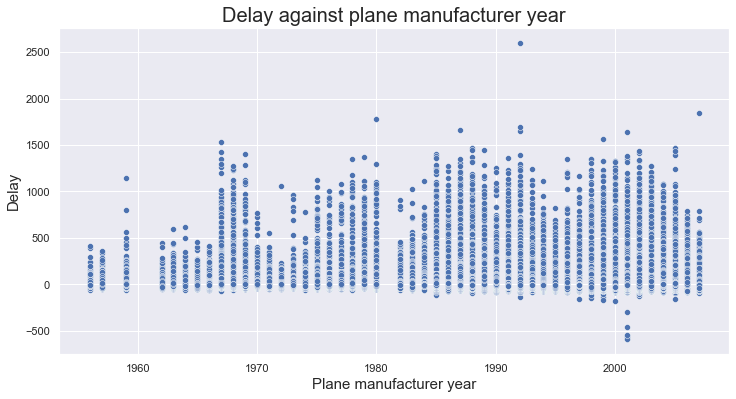

In [60]:
fig, ax = plt.subplots(figsize=(12,6))
sns.scatterplot(data=plane_df_detail, x ='plane_year', y ='Delay', palette = "deep")
ax.set_xlabel('Plane manufacturer year', fontsize = 15)
ax.set_ylabel('Delay' , fontsize = 15)
ax.set_title('Delay against plane manufacturer year', fontsize = 20)
plt.show()
#plot scatter plot

there is too much outliers, therefore we need to exclude the outliers

In [61]:
plane_null = plane_df_detail.loc[plane_df_detail['Delay'].isnull()]
print(plane_null) #there are null values for Delay

Empty DataFrame
Columns: [tailnum, plane_year, Delay]
Index: []


In [62]:
#Clean null values
plane_df_detail = plane_df_detail.dropna(subset=['Delay'])

# IQR
Q1 = np.percentile(plane_df_detail['Delay'], 25,
                   interpolation='midpoint')
 
Q3 = np.percentile(plane_df_detail['Delay'], 75,
                   interpolation='midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", plane_df_detail.shape)
 
# Upper bound
upper = Q3 + 1.5 * IQR
upper_array = plane_df_detail['Delay'] >= upper
# Lower bound
lower = Q1 - 1.5 * IQR
lower_array = plane_df_detail['Delay'] <= lower
# Removing the outliers
plane_df_detail.drop(plane_df_detail.loc[upper_array].index, inplace=True)
plane_df_detail.drop(plane_df_detail.loc[lower_array].index, inplace=True)

print("New Shape: ", plane_df_detail.shape)

Old Shape:  (11566687, 3)
New Shape:  (10513052, 3)


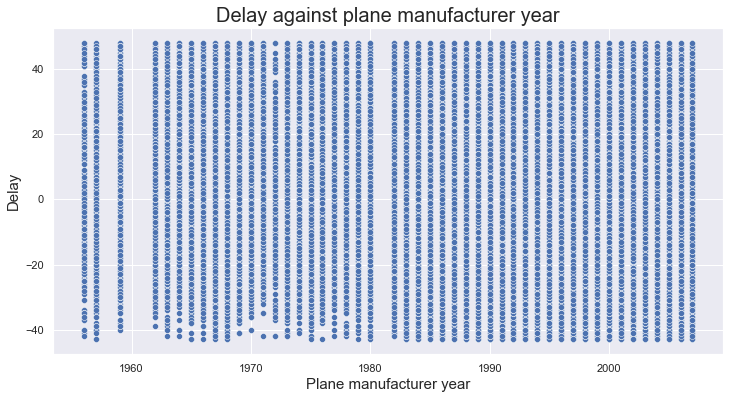

In [63]:
fig, ax = plt.subplots(figsize=(12,6))
sns.scatterplot(data=plane_df_detail, x ='plane_year', y ='Delay', palette = "deep")
ax.set_xlabel('Plane manufacturer year', fontsize = 15)
ax.set_ylabel('Delay' , fontsize = 15)
ax.set_title('Delay against plane manufacturer year', fontsize = 20)
plt.show()

In [64]:
#Create average delay data
delay_plane_average = plane_df_detail.groupby(by=['plane_year']).mean()
delay_plane_average = delay_plane_average.reset_index(drop = False)
delay_plane_average.head(10)

,plane_year,Delay
0,1956,-0.926877
1,1957,-1.113219
2,1959,0.558804
3,1962,0.223324
4,1963,0.228674
5,1964,-0.151847
6,1965,-0.677215
7,1966,1.623546
8,1967,1.993400
9,1968,2.399292


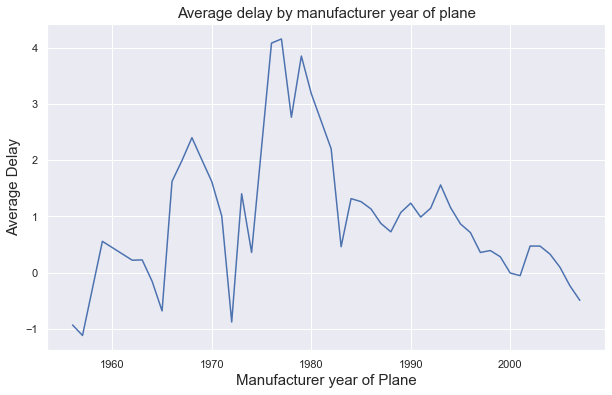

In [65]:
# Line plot for question 2
fig, ax = plt.subplots(figsize=(10,6))
sns.lineplot(x=delay_plane_average['plane_year'], y = delay_plane_average['Delay'], palette = 'colorblind')
ax.set_xlabel('Manufacturer year of Plane', fontsize = 15)
ax.set_ylabel('Average Delay' , fontsize = 15)
ax.set_title('Average delay by manufacturer year of plane', fontsize = 15)
plt.show()

In [66]:
#Create a new column
#Now we define if the manufacturing year of the plane is less than 1981 then the plane is Old plane, else, it is defined as New Plane
plane_df_detail['Status'] = plane_df_detail['plane_year'].apply(lambda x: 'New(>1981)' if x >=1981  else 'Old(>1956)')
plane_df_detail

,tailnum,plane_year,Delay,Status
0,N657AW,1999,6.0,New(>1981)
1,N657AW,1999,-5.0,New(>1981)
2,N657AW,1999,-10.0,New(>1981)
3,N657AW,1999,-2.0,New(>1981)
4,N657AW,1999,-2.0,New(>1981)
...,...,...,...,...
12726993,N665JB,2007,40.0,New(>1981)
12726994,N665JB,2007,10.0,New(>1981)
12726995,N665JB,2007,-3.0,New(>1981)
12726996,N665JB,2007,-1.0,New(>1981)


In [67]:
#Conduct a table of Old Plane and New Plane for total delay
#Prepare data
status_plane = plane_df_detail[['Status', 'Delay']]

status_plane = status_plane.groupby(by = ['Status']).sum()
status_plane = status_plane.reset_index(drop = False)
status_counts = plane_df_detail.groupby(by='Status').size()
status_plane['Total Flight'] = status_plane['Status'].map(status_counts)
status_plane['Average Delay'] = status_plane['Delay']/status_plane['Total Flight']
status_plane

,Status,Delay,Total Flight,Average Delay
0,New(>1981),5146805.0,10223846,0.503412
1,Old(>1956),720070.0,289206,2.489817


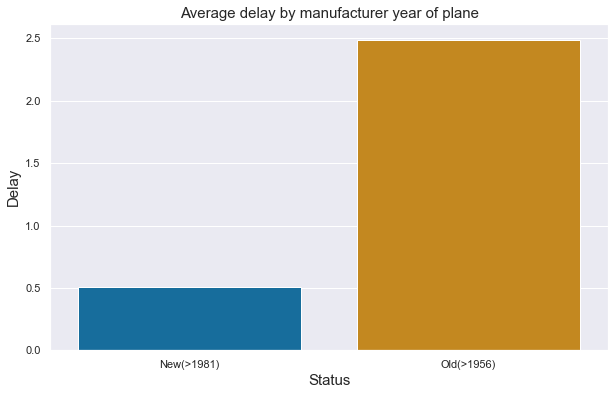

In [68]:
# Bar plot for question 2
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x= status_plane['Status'], y = status_plane['Average Delay'], palette = 'colorblind')
ax.set_xlabel('Status', fontsize = 15)
ax.set_ylabel('Delay' , fontsize = 15)
ax.set_title('Average delay by manufacturer year of plane', fontsize = 15)
plt.show()

In [69]:
plane_df_detail[plane_df_detail['Status'] == 'Old']['Delay']

Series([], Name: Delay, dtype: float64)

In [70]:
plane_df_detail[plane_df_detail['Status'] == 'New']['Delay']

Series([], Name: Delay, dtype: float64)

Construct a t-test

In [71]:
# Define the null and alternative hypotheses
# H0: Older plane has the same average delay time with Newer Plane
# Ha: Older plane suffers more delay than Newer Plane

# Conduct the t-test
t_stat, p_val = ttest_ind(plane_df_detail[plane_df_detail['Status'] == 'Old']['Delay'], plane_df_detail[plane_df_detail['Status'] == 'New']['Delay'])

# Set the significance level
alpha = 0.05

# Compare the p-value to alpha and interpret the results
if p_val <= alpha:
    print(f'The p-value is {p_val:.4f}, which is less than the significance level of {alpha:.2f}.')
    print("Reject the Null hypothesis, older plane suffers more delay than Newer Plane")
else:
    print(f'The p-value is {p_val:.4f}, which is greater than the significance level of {alpha:.2f}.')
    print("Fail to reject the Null hypothesis, older plane has the same average delay time with Newer Plane")

The p-value is nan, which is greater than the significance level of 0.05.
Fail to reject the Null hypothesis, older plane has the same average delay time with Newer Plane


Question 3: How does the number of people flying between different locations change over time?

In [72]:
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'Date', 'Delay', 'DEP_TIME_BLK'],
      dtype='object')

In [73]:
df.dtypes

Year                          int64
Month                         int64
DayofMonth                    int64
DayOfWeek                    object
DepTime                     float64
CRSDepTime                   object
ArrTime                     float64
CRSArrTime                    int64
UniqueCarrier                object
FlightNum                     int64
TailNum                      object
ActualElapsedTime           float64
CRSElapsedTime              float64
AirTime                     float64
ArrDelay                    float64
DepDelay                    float64
Origin                       object
Dest                         object
Distance                      int64
TaxiIn                        int64
TaxiOut                       int64
Cancelled                     int64
CancellationCode             object
Diverted                      int64
CarrierDelay                  int64
WeatherDelay                  int64
NASDelay                      int64
SecurityDelay               

In [13]:
#Prepare Data
location_df = df[['Date', 'Origin', 'Dest']]
location_df['Route'] = location_df['Origin'] + '-' + location_df['Dest']
location_df['Route'].value_counts().head(10)

<ipython-input-13-cc2860b63179>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_df['Route'] = location_df['Origin'] + '-' + location_df['Dest']


OGG-HNL    30055
HNL-OGG    29774
LAX-LAS    27932
SAN-LAX    27373
LAX-SAN    27321
LAS-LAX    26937
BOS-LGA    24633
LIH-HNL    24632
LGA-BOS    24620
HNL-LIH    24391
Name: Route, dtype: int64

In [14]:
#Create a column for Year and Month as Time
location_df['Time'] = location_df['Date'].apply(lambda x: x.strftime('%Y-%m'))
location_df['RouteCount'] = 1
location_df

<ipython-input-14-40d036aa34f2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_df['Time'] = location_df['Date'].apply(lambda x: x.strftime('%Y-%m'))
<ipython-input-14-40d036aa34f2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_df['RouteCount'] = 1


,Date,Origin,Dest,Route,Time,RouteCount
0,2006-01-11,ATL,PHX,ATL-PHX,2006-01,1
1,2006-01-11,ATL,PHX,ATL-PHX,2006-01,1
2,2006-01-11,ATL,PHX,ATL-PHX,2006-01,1
3,2006-01-11,AUS,PHX,AUS-PHX,2006-01,1
4,2006-01-11,AUS,PHX,AUS-PHX,2006-01,1
...,...,...,...,...,...,...
7453210,2007-12-15,MCO,ATL,MCO-ATL,2007-12,1
7453211,2007-12-15,ATL,SLC,ATL-SLC,2007-12,1
7453212,2007-12-15,LAX,ATL,LAX-ATL,2007-12,1
7453213,2007-12-15,DFW,ATL,DFW-ATL,2007-12,1


In [15]:
monthly_counts = location_df.groupby(['Time', 'Route'])['RouteCount'].sum().reset_index()
monthly_counts

,Time,Route,RouteCount
0,2006-01,ABE-ATL,91
1,2006-01,ABE-CLE,79
2,2006-01,ABE-CLT,32
3,2006-01,ABE-CVG,76
4,2006-01,ABE-DTW,3
...,...,...,...
103602,2007-12,YUM-IPL,54
103603,2007-12,YUM-LAS,21
103604,2007-12,YUM-LAX,91
103605,2007-12,YUM-PHX,149


In [16]:
monthly_counts['Route'].value_counts()

AUS-PHX    24
SAT-TPA    24
SLC-SAN    24
IAH-CHA    24
MRY-LAS    24
           ..
CVG-FNT     1
TWF-PIH     1
ORF-IND     1
BUR-COS     1
CAE-JFK     1
Name: Route, Length: 5823, dtype: int64

In [17]:
#Top routes in these two years
location_df['Time'] = pd.to_datetime(location_df['Date']).dt.to_period('M')
route_counts = location_df.groupby(['Time', 'Route']).size().reset_index(name='Num_Flights')
top_routes = route_counts.nlargest(15, 'Num_Flights')
top_routes

<ipython-input-17-2f3eb4d5ead1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_df['Time'] = pd.to_datetime(location_df['Date']).dt.to_period('M')


,Time,Route,Num_Flights
26347,2006-07,HNL-OGG,1688
27543,2006-07,OGG-HNL,1688
30471,2006-08,HNL-OGG,1608
31680,2006-08,OGG-HNL,1608
82646,2007-08,HNL-OGG,1417
83997,2007-08,OGG-HNL,1417
52537,2007-01,OGG-HNL,1402
38764,2006-10,HNL-OGG,1397
39950,2006-10,OGG-HNL,1396
48156,2006-12,OGG-HNL,1393


In [23]:
#Create a top 15 routes df for plotting
top_routes_df = monthly_counts.groupby('Route')['RouteCount'].sum().sort_values(ascending=False).head(15).index.tolist()
top_routes_df

['OGG-HNL',
 'HNL-OGG',
 'LAX-LAS',
 'SAN-LAX',
 'LAX-SAN',
 'LAS-LAX',
 'BOS-LGA',
 'LIH-HNL',
 'LGA-BOS',
 'HNL-LIH',
 'LAS-PHX',
 'PHX-LAX',
 'LGA-DCA',
 'DCA-LGA',
 'PHX-LAS']

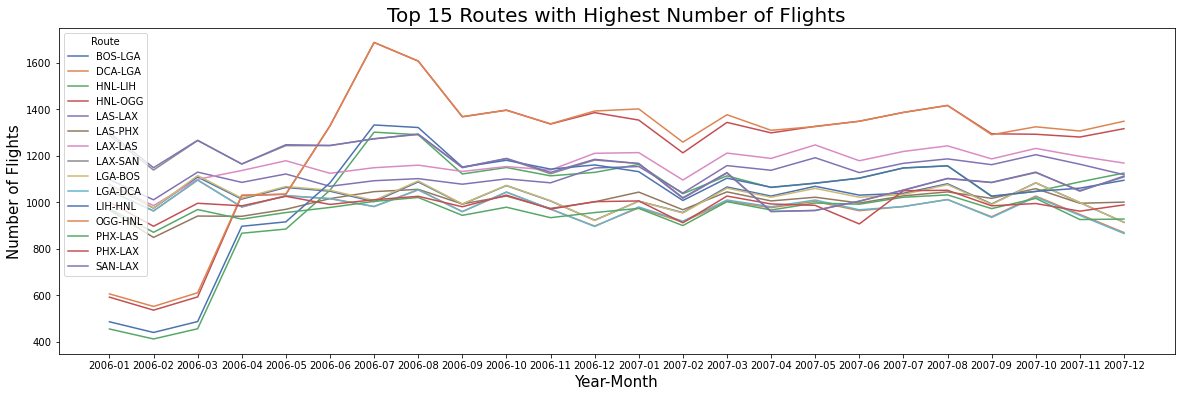

In [24]:
#Plotting a line plot
fig, ax = plt.subplots(figsize=(20, 6))
sns.lineplot(x='Time', y='RouteCount', hue='Route', data=monthly_counts[monthly_counts['Route'].isin(top_routes_df)], palette='deep')
plt.xlabel('Year-Month', fontsize=15)
plt.ylabel('Number of Flights', fontsize=15)
plt.title('Top 15 Routes with Highest Number of Flights', fontsize=20)
plt.show()

Question 4: Can you detect cascading failures as delays in one airport create delays in others?

In [81]:
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'Date', 'Delay', 'DEP_TIME_BLK'],
      dtype='object')

In [82]:
df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Date,Delay,DEP_TIME_BLK
0,2006,1,11,Wednesday,743.0,0745,1024.0,1018,US,343,...,NaN,0,0,0,0,0,0,2006-01-11,6.0,07:00
1,2006,1,11,Wednesday,1053.0,1053,1313.0,1318,US,613,...,NaN,0,0,0,0,0,0,2006-01-11,-5.0,10:00
2,2006,1,11,Wednesday,1915.0,1915,2110.0,2133,US,617,...,NaN,0,0,0,0,0,0,2006-01-11,-23.0,19:00
3,2006,1,11,Wednesday,1753.0,1755,1925.0,1933,US,300,...,NaN,0,0,0,0,0,0,2006-01-11,-8.0,17:00
4,2006,1,11,Wednesday,824.0,0832,1015.0,1015,US,765,...,NaN,0,0,0,0,0,0,2006-01-11,0.0,08:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7453210,2007,12,15,Saturday,1558.0,1605,1749.0,1736,DL,58,...,NaN,0,0,0,0,0,0,2007-12-15,13.0,16:00
7453211,2007,12,15,Saturday,1902.0,1851,2110.0,2105,DL,59,...,NaN,0,0,0,0,0,0,2007-12-15,5.0,18:00
7453212,2007,12,15,Saturday,1024.0,1025,1750.0,1735,DL,61,...,NaN,0,0,0,15,0,0,2007-12-15,15.0,10:00
7453213,2007,12,15,Saturday,1353.0,1315,1658.0,1622,DL,62,...,NaN,0,0,0,0,0,36,2007-12-15,36.0,13:00


In [83]:
#create a subset
airport_delay = df[['Date', 'DayOfWeek', 'Origin', 'Dest', 'Delay', 'TailNum', 'DepTime', 'ArrTime', 'DepDelay', 'ArrDelay', 'Cancelled','CRSElapsedTime','LateAircraftDelay','Diverted']]
airport_delay

,Date,DayOfWeek,Origin,Dest,Delay,TailNum,DepTime,ArrTime,DepDelay,ArrDelay,Cancelled,CRSElapsedTime,LateAircraftDelay,Diverted
0,2006-01-11,Wednesday,ATL,PHX,6.0,N657AW,743.0,1024.0,-2.0,6.0,0,273.0,0,0
1,2006-01-11,Wednesday,ATL,PHX,-5.0,N834AW,1053.0,1313.0,0.0,-5.0,0,265.0,0,0
2,2006-01-11,Wednesday,ATL,PHX,-23.0,N605AW,1915.0,2110.0,0.0,-23.0,0,258.0,0,0
3,2006-01-11,Wednesday,AUS,PHX,-8.0,N312AW,1753.0,1925.0,-2.0,-8.0,0,158.0,0,0
4,2006-01-11,Wednesday,AUS,PHX,0.0,N309AW,824.0,1015.0,-8.0,0.0,0,163.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7453210,2007-12-15,Saturday,MCO,ATL,13.0,N670DN,1558.0,1749.0,-7.0,13.0,0,91.0,0,0
7453211,2007-12-15,Saturday,ATL,SLC,5.0,N829MH,1902.0,2110.0,11.0,5.0,0,254.0,0,0
7453212,2007-12-15,Saturday,LAX,ATL,15.0,N623DL,1024.0,1750.0,-1.0,15.0,0,250.0,0,0
7453213,2007-12-15,Saturday,DFW,ATL,36.0,N970DL,1353.0,1658.0,38.0,36.0,0,127.0,36,0


In [84]:
airport_delay = airport_delay.drop(airport_delay[airport_delay['Cancelled'] == 1].index) #Cancelled flight is not required
airport_delay = airport_delay.drop(airport_delay[airport_delay['Diverted'] == 1].index) #Diverted flight is not required
airport_delay

,Date,DayOfWeek,Origin,Dest,Delay,TailNum,DepTime,ArrTime,DepDelay,ArrDelay,Cancelled,CRSElapsedTime,LateAircraftDelay,Diverted
0,2006-01-11,Wednesday,ATL,PHX,6.0,N657AW,743.0,1024.0,-2.0,6.0,0,273.0,0,0
1,2006-01-11,Wednesday,ATL,PHX,-5.0,N834AW,1053.0,1313.0,0.0,-5.0,0,265.0,0,0
2,2006-01-11,Wednesday,ATL,PHX,-23.0,N605AW,1915.0,2110.0,0.0,-23.0,0,258.0,0,0
3,2006-01-11,Wednesday,AUS,PHX,-8.0,N312AW,1753.0,1925.0,-2.0,-8.0,0,158.0,0,0
4,2006-01-11,Wednesday,AUS,PHX,0.0,N309AW,824.0,1015.0,-8.0,0.0,0,163.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7453210,2007-12-15,Saturday,MCO,ATL,13.0,N670DN,1558.0,1749.0,-7.0,13.0,0,91.0,0,0
7453211,2007-12-15,Saturday,ATL,SLC,5.0,N829MH,1902.0,2110.0,11.0,5.0,0,254.0,0,0
7453212,2007-12-15,Saturday,LAX,ATL,15.0,N623DL,1024.0,1750.0,-1.0,15.0,0,250.0,0,0
7453213,2007-12-15,Saturday,DFW,ATL,36.0,N970DL,1353.0,1658.0,38.0,36.0,0,127.0,36,0


In [85]:
airport_delay

,Date,DayOfWeek,Origin,Dest,Delay,TailNum,DepTime,ArrTime,DepDelay,ArrDelay,Cancelled,CRSElapsedTime,LateAircraftDelay,Diverted
0,2006-01-11,Wednesday,ATL,PHX,6.0,N657AW,743.0,1024.0,-2.0,6.0,0,273.0,0,0
1,2006-01-11,Wednesday,ATL,PHX,-5.0,N834AW,1053.0,1313.0,0.0,-5.0,0,265.0,0,0
2,2006-01-11,Wednesday,ATL,PHX,-23.0,N605AW,1915.0,2110.0,0.0,-23.0,0,258.0,0,0
3,2006-01-11,Wednesday,AUS,PHX,-8.0,N312AW,1753.0,1925.0,-2.0,-8.0,0,158.0,0,0
4,2006-01-11,Wednesday,AUS,PHX,0.0,N309AW,824.0,1015.0,-8.0,0.0,0,163.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7453210,2007-12-15,Saturday,MCO,ATL,13.0,N670DN,1558.0,1749.0,-7.0,13.0,0,91.0,0,0
7453211,2007-12-15,Saturday,ATL,SLC,5.0,N829MH,1902.0,2110.0,11.0,5.0,0,254.0,0,0
7453212,2007-12-15,Saturday,LAX,ATL,15.0,N623DL,1024.0,1750.0,-1.0,15.0,0,250.0,0,0
7453213,2007-12-15,Saturday,DFW,ATL,36.0,N970DL,1353.0,1658.0,38.0,36.0,0,127.0,36,0


In [86]:
#Prepare data
airport_delay['DepTime'] = airport_delay['DepTime'].astype(int)
airport_delay['DepTime'] = airport_delay['DepTime'].astype(str)
airport_delay['DepTime'] = airport_delay['DepTime'].str.pad(width=4, side='left', fillchar='0')
airport_delay['DepTime']

0          0743
1          1053
2          1915
3          1753
4          0824
           ... 
7453210    1558
7453211    1902
7453212    1024
7453213    1353
7453214    1824
Name: DepTime, Length: 13981556, dtype: object

In [87]:
airport_delay

,Date,DayOfWeek,Origin,Dest,Delay,TailNum,DepTime,ArrTime,DepDelay,ArrDelay,Cancelled,CRSElapsedTime,LateAircraftDelay,Diverted
0,2006-01-11,Wednesday,ATL,PHX,6.0,N657AW,0743,1024.0,-2.0,6.0,0,273.0,0,0
1,2006-01-11,Wednesday,ATL,PHX,-5.0,N834AW,1053,1313.0,0.0,-5.0,0,265.0,0,0
2,2006-01-11,Wednesday,ATL,PHX,-23.0,N605AW,1915,2110.0,0.0,-23.0,0,258.0,0,0
3,2006-01-11,Wednesday,AUS,PHX,-8.0,N312AW,1753,1925.0,-2.0,-8.0,0,158.0,0,0
4,2006-01-11,Wednesday,AUS,PHX,0.0,N309AW,0824,1015.0,-8.0,0.0,0,163.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7453210,2007-12-15,Saturday,MCO,ATL,13.0,N670DN,1558,1749.0,-7.0,13.0,0,91.0,0,0
7453211,2007-12-15,Saturday,ATL,SLC,5.0,N829MH,1902,2110.0,11.0,5.0,0,254.0,0,0
7453212,2007-12-15,Saturday,LAX,ATL,15.0,N623DL,1024,1750.0,-1.0,15.0,0,250.0,0,0
7453213,2007-12-15,Saturday,DFW,ATL,36.0,N970DL,1353,1658.0,38.0,36.0,0,127.0,36,0


In [88]:
airport_delay['DepTime'] = airport_delay['DepTime'].apply(lambda x: '0000' if x >= '2400' else x)
airport_delay['DepTime']

0          0743
1          1053
2          1915
3          1753
4          0824
           ... 
7453210    1558
7453211    1902
7453212    1024
7453213    1353
7453214    1824
Name: DepTime, Length: 13981556, dtype: object

In [89]:
airport_delay['Date and Dep Time'] = pd.to_datetime(airport_delay['Date'].astype(str) + ' ' + airport_delay['DepTime'].astype(str), format='%Y-%m-%d %H%M', errors='coerce')
airport_delay = airport_delay.sort_values(by= 'Date and Dep Time')

In [90]:
airport_delay

,Date,DayOfWeek,Origin,Dest,Delay,TailNum,DepTime,ArrTime,DepDelay,ArrDelay,Cancelled,CRSElapsedTime,LateAircraftDelay,Diverted,Date and Dep Time
120923,2006-01-01,Sunday,SLC,LAS,158.0,N87353,0000,30.0,150.0,158.0,0,82.0,150,0,2006-01-01 00:00:00
438812,2006-01-01,Sunday,LAX,MIA,-12.0,N5DEAA,0000,726.0,5.0,-12.0,0,283.0,0,0,2006-01-01 00:00:00
528003,2006-01-01,Sunday,LAS,CLE,18.0,N14731,0001,652.0,16.0,18.0,0,229.0,0,0,2006-01-01 00:01:00
276822,2006-01-01,Sunday,PHX,CLT,9.0,N164UW,0002,539.0,7.0,9.0,0,215.0,0,0,2006-01-01 00:02:00
243576,2006-01-01,Sunday,SMF,ORD,46.0,N468UA,0002,542.0,52.0,46.0,0,226.0,0,0,2006-01-01 00:02:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7351195,2007-12-31,Monday,ORD,SEA,224.0,N5BRAA,2358,214.0,233.0,224.0,0,265.0,182,0,2007-12-31 23:58:00
7139808,2007-12-31,Monday,LAS,MSP,-9.0,N675AW,2358,501.0,4.0,-9.0,0,196.0,0,0,2007-12-31 23:58:00
7407802,2007-12-31,Monday,SEA,JFK,-15.0,N658JB,2359,745.0,0.0,-15.0,0,301.0,0,0,2007-12-31 23:59:00
7139682,2007-12-31,Monday,DTW,LAS,202.0,N657AW,2359,225.0,149.0,202.0,0,273.0,147,0,2007-12-31 23:59:00


In [91]:
#create a column to see whether there is a delay
airport_delay['DepDelay'] = airport_delay['DepDelay'].apply(lambda x: 1 if x > 0 else 0)
airport_delay['ArrDelay'] = airport_delay['ArrDelay'].apply(lambda x: 1 if x > 0 else 0)

In [92]:
airport_delay

,Date,DayOfWeek,Origin,Dest,Delay,TailNum,DepTime,ArrTime,DepDelay,ArrDelay,Cancelled,CRSElapsedTime,LateAircraftDelay,Diverted,Date and Dep Time
120923,2006-01-01,Sunday,SLC,LAS,158.0,N87353,0000,30.0,1,1,0,82.0,150,0,2006-01-01 00:00:00
438812,2006-01-01,Sunday,LAX,MIA,-12.0,N5DEAA,0000,726.0,1,0,0,283.0,0,0,2006-01-01 00:00:00
528003,2006-01-01,Sunday,LAS,CLE,18.0,N14731,0001,652.0,1,1,0,229.0,0,0,2006-01-01 00:01:00
276822,2006-01-01,Sunday,PHX,CLT,9.0,N164UW,0002,539.0,1,1,0,215.0,0,0,2006-01-01 00:02:00
243576,2006-01-01,Sunday,SMF,ORD,46.0,N468UA,0002,542.0,1,1,0,226.0,0,0,2006-01-01 00:02:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7351195,2007-12-31,Monday,ORD,SEA,224.0,N5BRAA,2358,214.0,1,1,0,265.0,182,0,2007-12-31 23:58:00
7139808,2007-12-31,Monday,LAS,MSP,-9.0,N675AW,2358,501.0,1,0,0,196.0,0,0,2007-12-31 23:58:00
7407802,2007-12-31,Monday,SEA,JFK,-15.0,N658JB,2359,745.0,0,0,0,301.0,0,0,2007-12-31 23:59:00
7139682,2007-12-31,Monday,DTW,LAS,202.0,N657AW,2359,225.0,1,1,0,273.0,147,0,2007-12-31 23:59:00


In [93]:
airport_delay['TailNum'].value_counts().head(10) #observe the top 10 plane with the highest number of flights

N308SW    8383
N478HA    8032
N479HA    7925
N485HA    7916
N480HA    7910
N484HA    7835
N481HA    7776
N475HA    7714
N487HA    7702
N477HA    7691
Name: TailNum, dtype: int64

In [94]:
#select plane with the tail number N479HA
tailnum_N479HA = airport_delay[airport_delay['TailNum'] == 'N479HA'].sort_values(by=['Date and Dep Time'])
tailnum_N479HA

,Date,DayOfWeek,Origin,Dest,Delay,TailNum,DepTime,ArrTime,DepDelay,ArrDelay,Cancelled,CRSElapsedTime,LateAircraftDelay,Diverted,Date and Dep Time
341881,2006-01-01,Sunday,HNL,OGG,-6.0,N479HA,0801,836.0,0,0,0,37.0,0,0,2006-01-01 08:01:00
343055,2006-01-01,Sunday,OGG,LIH,-9.0,N479HA,0901,944.0,0,0,0,43.0,0,0,2006-01-01 09:01:00
343024,2006-01-01,Sunday,LIH,HNL,-6.0,N479HA,1014,1043.0,0,0,0,29.0,0,0,2006-01-01 10:14:00
342160,2006-01-01,Sunday,HNL,OGG,-6.0,N479HA,1115,1151.0,0,0,0,37.0,0,0,2006-01-01 11:15:00
342191,2006-01-01,Sunday,OGG,HNL,-8.0,N479HA,1219,1251.0,0,0,0,34.0,0,0,2006-01-01 12:19:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7224263,2007-12-31,Monday,KOA,HNL,-2.0,N479HA,1544,1626.0,0,0,0,40.0,0,0,2007-12-31 15:44:00
7223556,2007-12-31,Monday,HNL,LIH,-2.0,N479HA,1657,1735.0,0,0,0,37.0,0,0,2007-12-31 16:57:00
7223587,2007-12-31,Monday,LIH,HNL,-4.0,N479HA,1759,1830.0,0,0,0,29.0,0,0,2007-12-31 17:59:00
7224790,2007-12-31,Monday,HNL,ITO,0.0,N479HA,1902,1956.0,0,0,0,51.0,0,0,2007-12-31 19:02:00


In [95]:
#make the dataset smaller
airport_delay_N479HA = tailnum_N479HA[['TailNum','DepDelay','ArrDelay']]
airport_delay_N479HA

,TailNum,DepDelay,ArrDelay
341881,N479HA,0,0
343055,N479HA,0,0
343024,N479HA,0,0
342160,N479HA,0,0
342191,N479HA,0,0
...,...,...,...
7224263,N479HA,0,0
7223556,N479HA,0,0
7223587,N479HA,0,0
7224790,N479HA,0,0


In [96]:
#Detect cascading failure for the departure on the next airport
airport_delay_N479HA['dep_casc']=airport_delay_N479HA['DepDelay']+airport_delay_N479HA['ArrDelay']+airport_delay_N479HA['DepDelay'].shift(1)

#Detect cascading failure for the arrival on the next airport
airport_delay_N479HA['arr_casc']=airport_delay_N479HA['DepDelay']+airport_delay_N479HA['ArrDelay']+airport_delay_N479HA['ArrDelay'].shift(1)

#Cascading failure occurs when the dep_casc or arr_casc == 3.0, which means there is delay in the next airport
airport_delay_N479HA = airport_delay_N479HA[(airport_delay_N479HA["dep_casc"] == 3.0) | (airport_delay_N479HA["arr_casc"] == 3.0)]

airport_delay_N479HA

<ipython-input-96-7672ecc15c79>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airport_delay_N479HA['dep_casc']=airport_delay_N479HA['DepDelay']+airport_delay_N479HA['ArrDelay']+airport_delay_N479HA['DepDelay'].shift(1)
<ipython-input-96-7672ecc15c79>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airport_delay_N479HA['arr_casc']=airport_delay_N479HA['DepDelay']+airport_delay_N479HA['ArrDelay']+airport_delay_N479HA['ArrDelay'].shift(1)


,TailNum,DepDelay,ArrDelay,dep_casc,arr_casc
343994,N479HA,1,1,2.0,3.0
342701,N479HA,1,1,3.0,3.0
343044,N479HA,1,1,3.0,3.0
342836,N479HA,1,1,2.0,3.0
896885,N479HA,1,1,3.0,3.0
...,...,...,...,...,...
7223000,N479HA,1,1,3.0,3.0
7222969,N479HA,1,1,3.0,3.0
7224203,N479HA,1,1,3.0,3.0
7224079,N479HA,1,1,3.0,3.0


In [97]:
airport_delay_N479HA =airport_delay_N479HA.groupby("TailNum").count().reset_index(drop=False)
airport_delay_N479HA = airport_delay_N479HA[['TailNum','arr_casc']] #sort
airport_delay_N479HA.rename(columns={'arr_casc': 'Cascading Failures'}, inplace=True) #rename
airport_delay_N479HA['Total Flights'] = len(tailnum_N479HA)
airport_delay_N479HA

,TailNum,Cascading Failures,Total Flights
0,N479HA,467,7925


In [98]:
#select another plane
tailnum_N478HA = airport_delay[airport_delay['TailNum'] == 'N478HA'].sort_values(by=['Date and Dep Time'])
tailnum_N478HA

,Date,DayOfWeek,Origin,Dest,Delay,TailNum,DepTime,ArrTime,DepDelay,ArrDelay,Cancelled,CRSElapsedTime,LateAircraftDelay,Diverted,Date and Dep Time
341912,2006-01-01,Sunday,KOA,HNL,-4.0,N478HA,0846,924.0,0,0,0,40.0,0,0,2006-01-01 08:46:00
343620,2006-01-01,Sunday,HNL,OGG,-2.0,N478HA,1002,1040.0,0,0,0,37.0,0,0,2006-01-01 10:02:00
342838,2006-01-01,Sunday,HNL,KOA,-10.0,N478HA,1207,1248.0,0,0,0,43.0,0,0,2006-01-01 12:07:00
342869,2006-01-01,Sunday,KOA,OGG,-9.0,N478HA,1319,1348.0,0,0,0,29.0,0,0,2006-01-01 13:19:00
342900,2006-01-01,Sunday,OGG,HNL,-8.0,N478HA,1418,1451.0,0,0,0,34.0,0,0,2006-01-01 14:18:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7222787,2007-12-31,Monday,KOA,HNL,-1.0,N478HA,1444,1527.0,0,0,0,40.0,0,0,2007-12-31 14:44:00
7225161,2007-12-31,Monday,HNL,OGG,-1.0,N478HA,1601,1641.0,0,0,0,37.0,0,0,2007-12-31 16:01:00
7225130,2007-12-31,Monday,OGG,HNL,-2.0,N478HA,1707,1742.0,0,0,0,34.0,0,0,2007-12-31 17:07:00
7224387,2007-12-31,Monday,HNL,ITO,-2.0,N478HA,1814,1909.0,0,0,0,51.0,0,0,2007-12-31 18:14:00


In [99]:
#make the dataset smaller
airport_delay_N478HA = tailnum_N478HA[['TailNum','DepDelay','ArrDelay']]

#Detect cascading failure for the departure on the next airport
airport_delay_N478HA['dep_casc']=airport_delay_N478HA['DepDelay']+airport_delay_N478HA['ArrDelay']+airport_delay_N478HA['DepDelay'].shift(1)

#Detect cascading failure for the arrival on the next airport
airport_delay_N478HA['arr_casc']=airport_delay_N478HA['DepDelay']+airport_delay_N478HA['ArrDelay']+airport_delay_N478HA['ArrDelay'].shift(1)

#Cascading failure occurs when the dep_casc or arr_casc == 3.0, which means there is delays in the next airport
airport_delay_N478HA = airport_delay_N478HA[(airport_delay_N478HA["dep_casc"] == 3.0) | (airport_delay_N478HA["arr_casc"] == 3.0)]

airport_delay_N478HA =airport_delay_N478HA.groupby("TailNum").count().reset_index(drop=False)
airport_delay_N478HA = airport_delay_N478HA[['TailNum','arr_casc']] #sort
airport_delay_N478HA.rename(columns={'arr_casc': 'Cascading Failures'}, inplace=True) #rename
airport_delay_N478HA['Total Flights'] = len(tailnum_N478HA)
airport_delay_N478HA

<ipython-input-99-1b2efdd126c1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airport_delay_N478HA['dep_casc']=airport_delay_N478HA['DepDelay']+airport_delay_N478HA['ArrDelay']+airport_delay_N478HA['DepDelay'].shift(1)
<ipython-input-99-1b2efdd126c1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airport_delay_N478HA['arr_casc']=airport_delay_N478HA['DepDelay']+airport_delay_N478HA['ArrDelay']+airport_delay_N478HA['ArrDelay'].shift(1)


,TailNum,Cascading Failures,Total Flights
0,N478HA,491,8032


In [100]:
#count departure and arrival delays
delay1_NA79HA = tailnum_N479HA['DepDelay'][(tailnum_N479HA['DepDelay'] == 1)].count()
delay2_NA79HA = tailnum_N479HA['DepDelay'][(tailnum_N479HA["DepDelay"] == 1) & (tailnum_N479HA["ArrDelay"] == 1)].count()

#count departure and arrival delays
delay1_N478HA = tailnum_N478HA['DepDelay'][(tailnum_N478HA['DepDelay'] == 1)].count()
delay2_N478HA = tailnum_N478HA['DepDelay'][(tailnum_N478HA["DepDelay"] == 1) & (tailnum_N478HA["ArrDelay"] == 1)].count()

In [101]:
casc_N479HA = airport_delay_N479HA['Cascading Failures'].item()
casc_N478HA = airport_delay_N479HA['Cascading Failures'].item()

perc1_N479HA = casc_N479HA/delay1_NA79HA*100 #percentage of the delay in the first airport
perc2_N479HA = casc_N479HA/delay2_NA79HA*100  #percentage of the delay in first and second airport
perc3_N479HA = casc_N479HA/ len(tailnum_N479HA)*100 #percentage of the delay in total flights

perc1_N478HA = casc_N478HA/delay1_N478HA*100 #percentage of the delay in the first airport
perc2_N478HA = casc_N478HA/delay2_N478HA*100 #percentage of the delay in first and second airport
perc3_N478HA = casc_N478HA/ len(tailnum_N478HA)*100 #percentage of the delay in total flights

print("The percentage of cascading failures for flights with delay in the first airport for N479HA is ",perc1_N479HA, "%")
print("The percentage of cascading failures for flights with delay in the first and second airport for N479HA is ",perc2_N479HA,"%")
print("The percentage of cascading failures for flights with delay in total flights for N479HA is ",perc3_N479HA, "%")

print("The percentage of cascading failures for flights with delay in the first airport for N478HA is ",perc1_N478HA, "%")
print("The percentage of cascading failures for flights with delay in the first and second airport for N478HA is ",perc2_N478HA,"%")
print("The percentage of cascading failures for flights with delay in total flights for N478HA is ",perc3_N478HA, "%")

The percentage of cascading failures for flights with delay in the first airport for N479HA is  60.41397153945667 %
The percentage of cascading failures for flights with delay in the first and second airport for N479HA is  71.84615384615385 %
The percentage of cascading failures for flights with delay in total flights for N479HA is  5.892744479495268 %
The percentage of cascading failures for flights with delay in the first airport for N478HA is  54.556074766355145 %
The percentage of cascading failures for flights with delay in the first and second airport for N478HA is  66.52421652421653 %
The percentage of cascading failures for flights with delay in total flights for N478HA is  5.814243027888446 %


In [102]:
#Preparing data
airport_delay_N479HA['Cascading Failures(%)'] = perc3_N479HA
airport_delay_N478HA['Cascading Failures(%)'] = perc3_N478HA
airport_delay_N479HA['Cascading Failures with delay in first Airport(%)'] = perc1_N479HA
airport_delay_N478HA['Cascading Failures with delay in first Airport(%)'] = perc1_N478HA
airport_delay_N479HA['Cascading Failures with delay in first and second Airport(%)'] = perc2_N479HA
airport_delay_N478HA['Cascading Failures with delay in first and second Airport(%)'] = perc2_N478HA

In [103]:
cascading_failure = pd.concat([airport_delay_N478HA, airport_delay_N479HA])
cascading_failure

,TailNum,Cascading Failures,Total Flights,Cascading Failures(%),Cascading Failures with delay in first Airport(%),Cascading Failures with delay in first and second Airport(%)
0,N478HA,491,8032,5.814243,54.556075,66.524217
0,N479HA,467,7925,5.892744,60.413972,71.846154


There is about 5.83% of Cascading Failures among total flights. For N478H, there are 54.73% of cascading failures occur when there are delay in the first airport and 66.71% of cascading failures occus when there are delay in the first and second airport. For N479HA, there are 60.73% of cascading failures occur when there are delay in the first airport and 71.93% of cascading failures occus when there are delay in the first and second airport.

Therefore we can conclude that delays in one airport can cause cascading failures and create delays in other airport.


# Machine learning

Question 5 : Use the available variables to construct a model that predicts delays.

Linear Regression

In [25]:
X = df.copy()
X

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Date,Delay,DEP_TIME_BLK
0,2006,1,11,Wednesday,743.0,0745,1024.0,1018,US,343,...,NaN,0,0,0,0,0,0,2006-01-11,6.0,07:00
1,2006,1,11,Wednesday,1053.0,1053,1313.0,1318,US,613,...,NaN,0,0,0,0,0,0,2006-01-11,-5.0,10:00
2,2006,1,11,Wednesday,1915.0,1915,2110.0,2133,US,617,...,NaN,0,0,0,0,0,0,2006-01-11,-23.0,19:00
3,2006,1,11,Wednesday,1753.0,1755,1925.0,1933,US,300,...,NaN,0,0,0,0,0,0,2006-01-11,-8.0,17:00
4,2006,1,11,Wednesday,824.0,0832,1015.0,1015,US,765,...,NaN,0,0,0,0,0,0,2006-01-11,0.0,08:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7453210,2007,12,15,Saturday,1558.0,1605,1749.0,1736,DL,58,...,NaN,0,0,0,0,0,0,2007-12-15,13.0,16:00
7453211,2007,12,15,Saturday,1902.0,1851,2110.0,2105,DL,59,...,NaN,0,0,0,0,0,0,2007-12-15,5.0,18:00
7453212,2007,12,15,Saturday,1024.0,1025,1750.0,1735,DL,61,...,NaN,0,0,0,15,0,0,2007-12-15,15.0,10:00
7453213,2007,12,15,Saturday,1353.0,1315,1658.0,1622,DL,62,...,NaN,0,0,0,0,0,36,2007-12-15,36.0,13:00


In [26]:
X['DayOfWeek'] = X['DayOfWeek'].replace({'Monday': 1, 'Tuesday' :2, 'Wednesday':3, 'Thursday' :4,'Friday' :5,'Saturday' :6,'Sunday' :7})
#change to numeric numbers

In [27]:
# Drop those cancelled flight details
X = X.loc[X['Cancelled'] != 1] 

In [28]:
# Drop those diverted flight
X = X.loc[X['Diverted'] != 1] 

In [29]:
# Drop unique identifers
X.drop(columns = ['FlightNum', 'TailNum', 'CancellationCode'], inplace=True)

Check correlation to avoid multicollinearity

<AxesSubplot:>

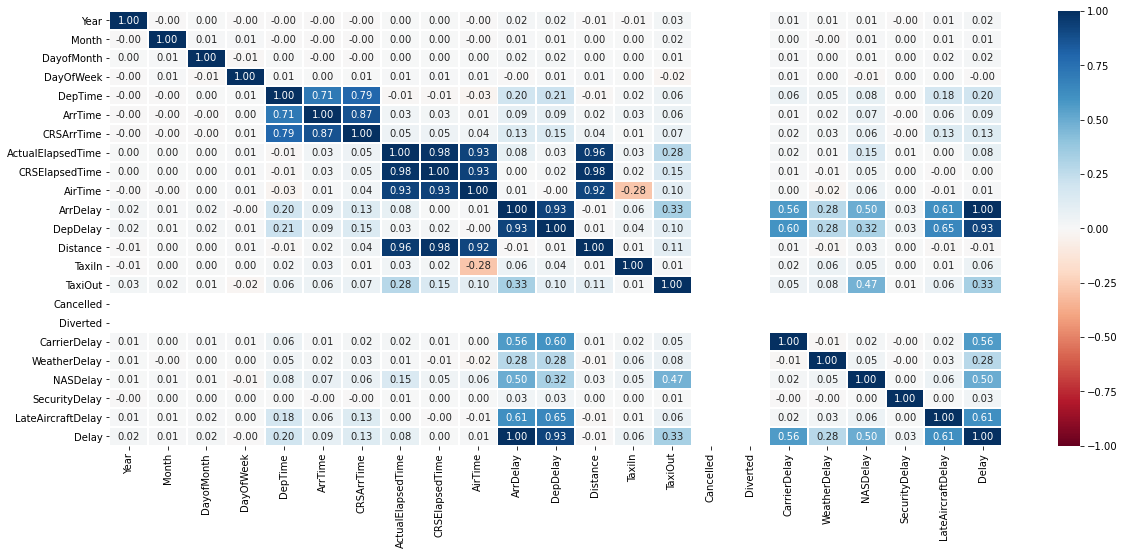

In [31]:
# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(20, 8))
sns.heatmap(X.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 10}, cmap = "RdBu")

In [32]:
y = X['ArrDelay'].values
y

array([  6.,  -5., -23., ...,  15.,  36.,  33.])

In [33]:
# Drop unnecessary & high correlation features & target variable
X.drop(columns=['Year', 'CRSDepTime', 'CRSArrTime', 'DayofMonth', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'TaxiIn', 'TaxiOut', 'DepDelay', 'Cancelled', 'Diverted', 'ArrDelay','Date','Delay','DEP_TIME_BLK'], inplace=True)

In [34]:
{col: len(X[col].unique()) for col in X.columns}

{'Month': 12,
 'DayOfWeek': 7,
 'DepTime': 1552,
 'ArrTime': 1635,
 'UniqueCarrier': 21,
 'Origin': 308,
 'Dest': 307,
 'Distance': 1439,
 'CarrierDelay': 1162,
 'WeatherDelay': 696,
 'NASDelay': 632,
 'SecurityDelay': 228,
 'LateAircraftDelay': 646}

Encode the categorical variable by using target encoding, since there are too much categories for doing one hot encoding (will create too much column)

In [35]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2, random_state=42
)

# Initialize a target encoder
te = ce.TargetEncoder(cols=['UniqueCarrier', 'Origin', 'Dest'])

# Fit the encoder on the training set
te.fit(X_train, y_train)

TargetEncoder(cols=['UniqueCarrier', 'Origin', 'Dest'])

Create encoded train and test predictors arrays

In [36]:
# Transform the categorical variables in the training and testing sets
X_train_encoded = te.transform(X_train)
X_test_encoded = te.transform(X_test)

X_train_encoded

,Month,DayOfWeek,DepTime,ArrTime,UniqueCarrier,Origin,Dest,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
5595898,10,2,1618.0,1740.0,9.052353,6.638754,7.264650,369,0,0,0,0,0
2209688,4,2,1714.0,1749.0,-0.784356,0.471835,0.952694,100,0,0,0,0,0
6519987,11,5,819.0,1033.0,7.154652,12.852258,4.688840,1589,0,0,0,0,0
5858141,10,2,624.0,807.0,11.643374,4.545284,12.347920,447,0,0,0,0,0
6841060,12,7,1733.0,2351.0,7.154652,5.635315,11.112282,2105,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6462275,11,1,2100.0,2350.0,11.643374,16.592876,13.122287,678,61,0,0,0,15
4381826,8,2,958.0,1229.0,11.643374,16.592876,5.745414,1835,0,0,0,0,0
3160642,6,4,1233.0,1440.0,5.285583,7.060380,9.214811,254,2,0,12,0,11
6672419,12,3,1658.0,1903.0,11.282857,7.421422,7.506429,1013,24,0,0,0,0


In [37]:
X_train_encoded.dtypes

Month                  int64
DayOfWeek              int64
DepTime              float64
ArrTime              float64
UniqueCarrier        float64
Origin               float64
Dest                 float64
Distance               int64
CarrierDelay           int64
WeatherDelay           int64
NASDelay               int64
SecurityDelay          int64
LateAircraftDelay      int64
dtype: object

Fit linear regression model

In [38]:
# Fit a linear regression model to the training data
model = LinearRegression()
model.fit(X_train_encoded, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test_encoded)

# Evaluate the model using R-squared and F1-score
print("R-squared:", r2_score(y_test, y_pred))
print("F1-score:", f1_score(y_test > 0, y_pred > 0, average='weighted'))
print('Mean squared error:', mean_squared_error(y_test,y_pred))

R-squared: 0.9479930112752952
F1-score: 0.7572451832665271
Mean squared error: 75.53233666243507


Interpretation: 
1. R squared value of 0.95 is obtained, which means 95% of variance of the data is explained by the given predictors
2. F1 score of 0.76 indicates this model provides a better fit by current predictors as compared to no predictor 

We move to see the p value for each predictor to see whether they are statistically significant in predicting arrival delay

In [39]:
# Print the summary of the linear regression model
X_train_intercept = sm.add_constant(X_train_encoded)
linear_regression_model = sm.OLS(y_train, X_train_intercept).fit()
print(linear_regression_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                 1.592e+07
Date:                Tue, 04 Apr 2023   Prob (F-statistic):               0.00
Time:                        04:05:07   Log-Likelihood:            -4.0901e+07
No. Observations:            11423272   AIC:                         8.180e+07
Df Residuals:                11423258   BIC:                         8.180e+07
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -4.4076      0.01

All predictor possesses a p value lower than 0.05, which is a good news!

Proceed to do cross-validation to see whether the model overfits the data (R^2 value)

In [40]:
# create a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(model, X_train_encoded, y_train, scoring='r2', cv=folds)
scores   

array([0.94754096, 0.94791632, 0.94727941, 0.94783778, 0.94786887])

Cross validation for MSE 

In [41]:
# create a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(model, X_train_encoded, y_train, scoring='neg_mean_squared_error', cv=folds)
scores   

array([-75.39021157, -75.42078241, -75.36105909, -75.66207715,
       -75.30113775])

The MSE score isn't so good, so use cross validation to tune the features to be selected

In [42]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 14))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train_encoded, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'neg_mean_squared_error', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_encoded, y_train)

Fitting 5 folds for each of 13 candidates, totalling 65 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13]}],
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [43]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,20.982497,0.388637,0.147644,0.006243,1,{'n_features_to_select': 1},-1079.384641,-1090.941578,-1075.371307,-1093.215017,...,-1085.783519,7.057108,13,-1087.382325,-1084.493147,-1088.385413,-1083.924503,-1084.726987,-1085.782475,1.764273
1,20.793192,0.538160,0.165840,0.023698,2,{'n_features_to_select': 2},-586.698086,-592.476241,-577.171249,-596.028405,...,-590.401874,7.873832,12,-591.327297,-589.882665,-593.708881,-588.994576,-588.092908,-590.401266,1.968456
2,20.572255,1.088819,0.176392,0.010732,3,{'n_features_to_select': 3},-585.302232,-591.135257,-575.616521,-594.698570,...,-589.008904,7.951902,11,-589.935030,-588.476675,-592.356326,-587.585798,-586.687533,-589.008272,1.987974
3,19.561951,0.516970,0.174071,0.006934,4,{'n_features_to_select': 4},-164.724097,-165.954893,-164.258995,-167.394916,...,-165.311821,1.215340,10,-165.458411,-165.150738,-165.574700,-164.790689,-165.582924,-165.311492,0.303847
4,18.439198,0.196857,0.194655,0.025373,5,{'n_features_to_select': 5},-76.181066,-76.222334,-76.165690,-76.466736,...,-76.224362,0.129008,9,-76.235035,-76.224726,-76.238909,-76.163621,-76.258829,-76.224224,0.032258
5,17.563486,0.115955,0.201781,0.004579,6,{'n_features_to_select': 6},-76.138713,-76.175302,-76.124182,-76.422113,...,-76.180122,0.128823,8,-76.190307,-76.181171,-76.193972,-76.119460,-76.214934,-76.179969,0.032213
6,16.169887,0.062792,0.210172,0.003964,7,{'n_features_to_select': 7},-76.128848,-76.166530,-76.113570,-76.412391,...,-76.170185,0.129119,7,-76.180344,-76.170936,-76.184196,-76.109461,-76.205183,-76.170024,0.032287
7,15.030135,0.175908,0.220683,0.008384,8,{'n_features_to_select': 8},-76.125271,-76.163968,-76.110170,-76.408372,...,-76.166856,0.128826,6,-76.177065,-76.167406,-76.180872,-76.106294,-76.201781,-76.166684,0.032213
8,13.550680,0.156156,0.221087,0.001580,9,{'n_features_to_select': 9},-76.123959,-76.162303,-76.107866,-76.407613,...,-76.165438,0.129066,5,-76.175582,-76.166012,-76.179649,-76.104679,-76.200236,-76.165232,0.032272
9,11.455118,0.136304,0.228242,0.010519,10,{'n_features_to_select': 10},-76.123338,-76.162103,-76.107557,-76.407485,...,-76.165143,0.129133,4,-76.175357,-76.165674,-76.179337,-76.104324,-76.199901,-76.164918,0.032289


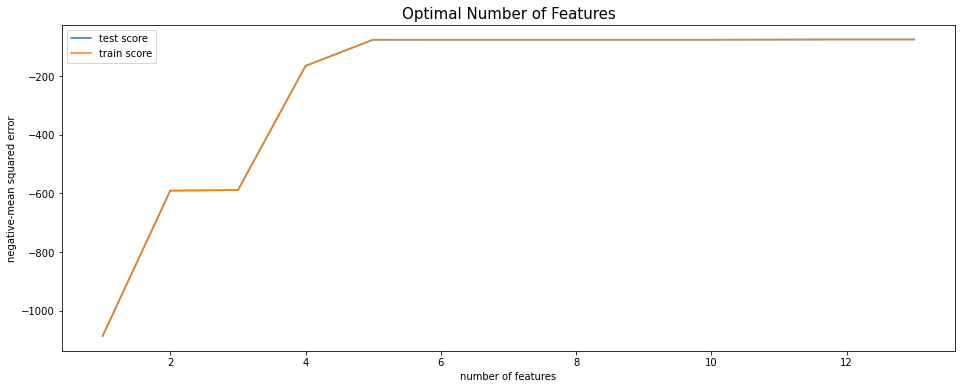

In [44]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('negative-mean squared error')
plt.title("Optimal Number of Features", fontsize = 15)
plt.legend(['test score', 'train score'], loc='upper left')

In [45]:
X_train.columns

Index(['Month', 'DayOfWeek', 'DepTime', 'ArrTime', 'UniqueCarrier', 'Origin',
       'Dest', 'Distance', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
       'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

Cross validation suggests that current number of features is the best result. Hence, we conclude evaluation metrics below for the linear regression model
1. R-squared: 0.95
2. F1-score: 0.75
3. Mean squared error: 75

given predictors ['Month', 'DayOfWeek', 'DepTime', 'ArrTime', 'UniqueCarrier', 'Origin',
       'Dest', 'Distance', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
       'SecurityDelay', 'LateAircraftDelay'],
in predicting ['ArrDelay']